<h2><b>Input : </b></h2>

*   train_microarray.csv
*   ab1_features.pkl
*   ab2_features.pkl
*   ab3_features.pkl

<h2><b>Output : </b></h2>

*   ab1_model.pkl
*   ab2_model.pkl
*   ab3_model.pkl

# Run All

## Import dan Load

Import library yang diperlukan

In [ ]:
import pandas as pd
import numpy as np

from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams

import joblib

Mengatur Style

In [ ]:
rcParams['figure.figsize'] = 15, 10
mpl.style.use(['ggplot'])

Load data train

In [ ]:
df_train = pd.read_csv('https://drive.google.com/uc?id=1MiU_0V6-LvZ_CyCuWf2HoW-WXNKSIFJQ')

Load hasil seleksi fitur

In [ ]:
ab1_features = joblib.load('ab1_features.pkl')
ab2_features = joblib.load('ab2_features.pkl')
ab3_features = joblib.load('ab3_features.pkl')

Df_train dengan fitur 1

In [ ]:
df_train1 = df_train[ab1_features]
df_train1.head()

,211612_s_at,217653_x_at,211996_s_at,214594_x_at,218155_x_at,202936_s_at,216609_at,207953_at,217679_x_at,210168_at,...,204919_at,202436_s_at,202437_s_at,209457_at,206584_at,217022_s_at,206835_at,202435_s_at,205749_at,Label
0,2.535743,2.052387,2.873506,2.285882,2.518572,2.656989,1.982433,2.324655,2.431334,2.458624,...,2.723190,2.481315,1.911761,2.790067,2.594274,3.326183,2.172511,1.817986,2.344495,1
1,2.587822,1.957657,2.779933,2.248177,2.508590,2.366057,2.139794,2.280555,2.374257,2.461287,...,2.761961,3.235303,3.104195,2.511882,2.270037,2.215997,2.492978,2.619466,2.850630,1
2,2.529666,2.059190,2.805088,2.255567,2.658405,2.542071,2.113104,2.323435,2.513285,2.488348,...,2.794787,3.018061,2.694711,2.600055,2.286755,2.428886,2.180694,2.300764,2.624524,0
3,2.274739,2.273920,2.952965,2.554384,2.736684,2.465318,2.204011,2.573738,2.646684,2.458046,...,2.436898,2.478467,1.743530,2.305844,1.810791,3.321267,2.043120,1.905358,2.407280,0
4,2.551101,2.321532,2.887101,2.752609,2.752873,2.608392,2.483343,2.565807,2.924184,2.526407,...,2.601354,2.681277,2.099440,2.453478,2.682590,3.044343,2.009510,1.929459,2.500476,0


Df_train dengan fitur 2

In [ ]:
df_train2 = df_train[ab2_features]
df_train2.head()

,211612_s_at,219678_x_at,217653_x_at,211996_s_at,214594_x_at,218155_x_at,202936_s_at,207730_x_at,209703_x_at,216609_at,...,209457_at,201925_s_at,206584_at,217022_s_at,206835_at,202435_s_at,205749_at,218541_s_at,217028_at,Label
0,2.535743,2.457776,2.052387,2.873506,2.285882,2.518572,2.656989,2.833421,2.448979,1.982433,...,2.790067,3.088773,2.594274,3.326183,2.172511,1.817986,2.344495,2.008092,2.582746,1
1,2.587822,2.408562,1.957657,2.779933,2.248177,2.508590,2.366057,2.871436,2.460372,2.139794,...,2.511882,2.883510,2.270037,2.215997,2.492978,2.619466,2.850630,1.712133,2.461546,1
2,2.529666,2.447706,2.059190,2.805088,2.255567,2.658405,2.542071,2.871085,2.435954,2.113104,...,2.600055,2.859327,2.286755,2.428886,2.180694,2.300764,2.624524,1.660744,2.621770,0
3,2.274739,2.537130,2.273920,2.952965,2.554384,2.736684,2.465318,2.988069,2.551221,2.204011,...,2.305844,2.200789,1.810791,3.321267,2.043120,1.905358,2.407280,1.582201,2.206625,0
4,2.551101,2.692597,2.321532,2.887101,2.752609,2.752873,2.608392,3.098642,2.643402,2.483343,...,2.453478,2.780409,2.682590,3.044343,2.009510,1.929459,2.500476,1.830177,2.974692,0


Df_train dengan fitur 3

In [ ]:
df_train3 = df_train[ab3_features]
df_train3.head()

,211612_s_at,219678_x_at,217653_x_at,211996_s_at,214594_x_at,218155_x_at,202936_s_at,207730_x_at,209703_x_at,216609_at,...,201123_s_at,219607_s_at,217028_at,220798_x_at,203290_at,202173_s_at,216841_s_at,206149_at,205681_at,Label
0,2.535743,2.457776,2.052387,2.873506,2.285882,2.518572,2.656989,2.833421,2.448979,1.982433,...,2.825503,2.081309,2.582746,2.102570,2.234970,2.154980,2.341958,3.059717,2.352974,1
1,2.587822,2.408562,1.957657,2.779933,2.248177,2.508590,2.366057,2.871436,2.460372,2.139794,...,2.900031,1.708599,2.461546,2.342672,2.157700,2.231532,2.303909,2.702865,2.804416,1
2,2.529666,2.447706,2.059190,2.805088,2.255567,2.658405,2.542071,2.871085,2.435954,2.113104,...,2.127788,1.750120,2.621770,2.311563,2.291107,2.242538,2.400200,2.927471,2.320344,0
3,2.274739,2.537130,2.273920,2.952965,2.554384,2.736684,2.465318,2.988069,2.551221,2.204011,...,2.404252,1.644098,2.206625,2.560912,2.367685,2.062988,1.886354,2.842158,1.897309,0
4,2.551101,2.692597,2.321532,2.887101,2.752609,2.752873,2.608392,3.098642,2.643402,2.483343,...,2.519814,2.204075,2.974692,2.712793,2.486182,2.249837,2.190492,2.959261,2.686662,0


## X_train dan y_train

In [ ]:
X1_train = df_train1.iloc[:,:-1]
X1_train.head()

,211612_s_at,217653_x_at,211996_s_at,214594_x_at,218155_x_at,202936_s_at,216609_at,207953_at,217679_x_at,210168_at,...,211506_s_at,204919_at,202436_s_at,202437_s_at,209457_at,206584_at,217022_s_at,206835_at,202435_s_at,205749_at
0,2.535743,2.052387,2.873506,2.285882,2.518572,2.656989,1.982433,2.324655,2.431334,2.458624,...,2.755095,2.723190,2.481315,1.911761,2.790067,2.594274,3.326183,2.172511,1.817986,2.344495
1,2.587822,1.957657,2.779933,2.248177,2.508590,2.366057,2.139794,2.280555,2.374257,2.461287,...,2.673444,2.761961,3.235303,3.104195,2.511882,2.270037,2.215997,2.492978,2.619466,2.850630
2,2.529666,2.059190,2.805088,2.255567,2.658405,2.542071,2.113104,2.323435,2.513285,2.488348,...,2.203789,2.794787,3.018061,2.694711,2.600055,2.286755,2.428886,2.180694,2.300764,2.624524
3,2.274739,2.273920,2.952965,2.554384,2.736684,2.465318,2.204011,2.573738,2.646684,2.458046,...,1.935497,2.436898,2.478467,1.743530,2.305844,1.810791,3.321267,2.043120,1.905358,2.407280
4,2.551101,2.321532,2.887101,2.752609,2.752873,2.608392,2.483343,2.565807,2.924184,2.526407,...,2.599627,2.601354,2.681277,2.099440,2.453478,2.682590,3.044343,2.009510,1.929459,2.500476


In [ ]:
y1_train = df_train1.iloc[:,-1]
y1_train.head()

0    1
1    1
2    0
3    0
4    0
Name: Label, dtype: int64

In [ ]:
X2_train = df_train2.iloc[:,:-1]
X2_train.head()

,211612_s_at,219678_x_at,217653_x_at,211996_s_at,214594_x_at,218155_x_at,202936_s_at,207730_x_at,209703_x_at,216609_at,...,213432_at,209457_at,201925_s_at,206584_at,217022_s_at,206835_at,202435_s_at,205749_at,218541_s_at,217028_at
0,2.535743,2.457776,2.052387,2.873506,2.285882,2.518572,2.656989,2.833421,2.448979,1.982433,...,3.470163,2.790067,3.088773,2.594274,3.326183,2.172511,1.817986,2.344495,2.008092,2.582746
1,2.587822,2.408562,1.957657,2.779933,2.248177,2.508590,2.366057,2.871436,2.460372,2.139794,...,3.298993,2.511882,2.883510,2.270037,2.215997,2.492978,2.619466,2.850630,1.712133,2.461546
2,2.529666,2.447706,2.059190,2.805088,2.255567,2.658405,2.542071,2.871085,2.435954,2.113104,...,3.123434,2.600055,2.859327,2.286755,2.428886,2.180694,2.300764,2.624524,1.660744,2.621770
3,2.274739,2.537130,2.273920,2.952965,2.554384,2.736684,2.465318,2.988069,2.551221,2.204011,...,3.262826,2.305844,2.200789,1.810791,3.321267,2.043120,1.905358,2.407280,1.582201,2.206625
4,2.551101,2.692597,2.321532,2.887101,2.752609,2.752873,2.608392,3.098642,2.643402,2.483343,...,2.906855,2.453478,2.780409,2.682590,3.044343,2.009510,1.929459,2.500476,1.830177,2.974692


In [ ]:
y2_train = df_train2.iloc[:,-1]
y2_train.head()

0    1
1    1
2    0
3    0
4    0
Name: Label, dtype: int64

In [ ]:
X3_train = df_train3.iloc[:,:-1]
X3_train.head()

,211612_s_at,219678_x_at,217653_x_at,211996_s_at,214594_x_at,218155_x_at,202936_s_at,207730_x_at,209703_x_at,216609_at,...,207300_s_at,201123_s_at,219607_s_at,217028_at,220798_x_at,203290_at,202173_s_at,216841_s_at,206149_at,205681_at
0,2.535743,2.457776,2.052387,2.873506,2.285882,2.518572,2.656989,2.833421,2.448979,1.982433,...,1.892513,2.825503,2.081309,2.582746,2.102570,2.234970,2.154980,2.341958,3.059717,2.352974
1,2.587822,2.408562,1.957657,2.779933,2.248177,2.508590,2.366057,2.871436,2.460372,2.139794,...,1.835913,2.900031,1.708599,2.461546,2.342672,2.157700,2.231532,2.303909,2.702865,2.804416
2,2.529666,2.447706,2.059190,2.805088,2.255567,2.658405,2.542071,2.871085,2.435954,2.113104,...,2.043599,2.127788,1.750120,2.621770,2.311563,2.291107,2.242538,2.400200,2.927471,2.320344
3,2.274739,2.537130,2.273920,2.952965,2.554384,2.736684,2.465318,2.988069,2.551221,2.204011,...,2.047637,2.404252,1.644098,2.206625,2.560912,2.367685,2.062988,1.886354,2.842158,1.897309
4,2.551101,2.692597,2.321532,2.887101,2.752609,2.752873,2.608392,3.098642,2.643402,2.483343,...,2.051628,2.519814,2.204075,2.974692,2.712793,2.486182,2.249837,2.190492,2.959261,2.686662


In [ ]:
y3_train = df_train3.iloc[:,-1]
y3_train.head()

0    1
1    1
2    0
3    0
4    0
Name: Label, dtype: int64

## Model tanpa Tuning

AB1

In [ ]:
ab1_non_tuning = AdaBoostClassifier()
ab1_non_tuning_acc = cross_val_score(ab1_non_tuning, X1_train, y1_train, scoring="accuracy", cv=10)
print("Akurasi masing-masing = ", ab1_non_tuning_acc)
print("Rata-rata = ", ab1_non_tuning_acc.mean())

Akurasi masing-masing =  [0.69230769 0.76923077 0.69230769 0.61538462 0.30769231 0.76923077
 0.76923077 0.92307692 0.84615385 0.61538462]
Rata-rata =  0.7


AB2

In [ ]:
ab2_non_tuning = AdaBoostClassifier()
ab2_non_tuning_acc = cross_val_score(ab2_non_tuning, X2_train, y2_train, scoring="accuracy", cv=10)
print("Akurasi masing-masing = ", ab2_non_tuning_acc)
print("Rata-rata = ", ab2_non_tuning_acc.mean())

Akurasi masing-masing =  [0.84615385 0.76923077 0.53846154 0.46153846 0.61538462 0.69230769
 0.92307692 0.84615385 0.84615385 0.69230769]
Rata-rata =  0.723076923076923


AB3

In [ ]:
ab3_non_tuning = AdaBoostClassifier()
ab3_non_tuning_acc = cross_val_score(ab3_non_tuning, X3_train, y3_train, scoring="accuracy", cv=10)
print("Akurasi masing-masing = ", ab3_non_tuning_acc)
print("Rata-rata = ", ab3_non_tuning_acc.mean())

Akurasi masing-masing =  [0.61538462 0.69230769 0.61538462 0.38461538 0.53846154 0.61538462
 0.76923077 0.92307692 0.84615385 0.61538462]
Rata-rata =  0.6615384615384615


## Hyperparameter Tuning

### Parameter yang akan dituning

Definisi Parameter

In [ ]:
parameters_ab = {
        'n_estimators' : [50, 100, 150, 200],
        'learning_rate' : [0.01, 0.1, 1]  
        }

### AB1

In [ ]:
ab1_tuning = AdaBoostClassifier()

Gridsearch (sekitar 3 menit running)

In [ ]:
search_ab1 = GridSearchCV(ab1_tuning,
                        parameters_ab,
                        scoring='accuracy',
                        cv = 10,
                        verbose=3)
search_ab1.fit(X1_train, y1_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV 1/10] END learning_rate=0.01, n_estimators=50;, score=0.769 total time=   0.2s
[CV 2/10] END learning_rate=0.01, n_estimators=50;, score=0.846 total time=   0.2s
[CV 3/10] END learning_rate=0.01, n_estimators=50;, score=0.692 total time=   0.1s
[CV 4/10] END learning_rate=0.01, n_estimators=50;, score=0.538 total time=   0.1s
[CV 5/10] END learning_rate=0.01, n_estimators=50;, score=0.538 total time=   0.1s
[CV 6/10] END learning_rate=0.01, n_estimators=50;, score=0.692 total time=   0.1s
[CV 7/10] END learning_rate=0.01, n_estimators=50;, score=0.769 total time=   0.1s
[CV 8/10] END learning_rate=0.01, n_estimators=50;, score=0.846 total time=   0.1s
[CV 9/10] END learning_rate=0.01, n_estimators=50;, score=0.615 total time=   0.1s
[CV 10/10] END learning_rate=0.01, n_estimators=50;, score=0.769 total time=   0.1s
[CV 1/10] END learning_rate=0.01, n_estimators=100;, score=0.769 total time=   0.3s
[CV 2/10] END learning

GridSearchCV(cv=10, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='accuracy', verbose=3)

Akurasi dan parameter terbaik pada Gridsearch

In [ ]:
ab1_best_acc_score = search_ab1.best_score_
ab1_best_parameter = search_ab1.best_params_
print("Akurasi terbaik = ", ab1_best_acc_score)
print("Parameter terbaik = ", ab1_best_parameter)

Akurasi terbaik =  0.7615384615384615
Parameter terbaik =  {'learning_rate': 1, 'n_estimators': 150}


Membuat model dengan parameter terbaik

In [ ]:
learning_rate = ab1_best_parameter["learning_rate"]
n_estimators = ab1_best_parameter["n_estimators"]

ab1_tuning = AdaBoostClassifier(learning_rate=learning_rate, n_estimators=n_estimators)

Cross val akhir

In [ ]:
ab1_tuning_acc = cross_val_score(ab1_tuning, X1_train, y1_train, scoring="accuracy", cv=10)
print("Akurasi masing-masing = ", ab1_tuning_acc)
print("Rata-rata = ", ab1_tuning_acc.mean())

Akurasi masing-masing =  [0.61538462 0.84615385 0.84615385 0.53846154 0.61538462 0.69230769
 0.92307692 0.92307692 0.84615385 0.76923077]
Rata-rata =  0.7615384615384615


### AB2

In [ ]:
ab2_tuning = AdaBoostClassifier()

Gridsearch (sekitar 3 menit running)

In [ ]:
search_ab2 = GridSearchCV(ab2_tuning,
                        parameters_ab,
                        scoring='accuracy',
                        cv = 10,
                        verbose=3)
search_ab2.fit(X2_train, y2_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV 1/10] END learning_rate=0.01, n_estimators=50;, score=0.769 total time=   0.2s
[CV 2/10] END learning_rate=0.01, n_estimators=50;, score=0.615 total time=   0.2s
[CV 3/10] END learning_rate=0.01, n_estimators=50;, score=0.692 total time=   0.2s
[CV 4/10] END learning_rate=0.01, n_estimators=50;, score=0.615 total time=   0.2s
[CV 5/10] END learning_rate=0.01, n_estimators=50;, score=0.462 total time=   0.2s
[CV 6/10] END learning_rate=0.01, n_estimators=50;, score=0.692 total time=   0.2s
[CV 7/10] END learning_rate=0.01, n_estimators=50;, score=0.692 total time=   0.2s
[CV 8/10] END learning_rate=0.01, n_estimators=50;, score=0.846 total time=   0.2s
[CV 9/10] END learning_rate=0.01, n_estimators=50;, score=0.615 total time=   0.2s
[CV 10/10] END learning_rate=0.01, n_estimators=50;, score=0.615 total time=   0.2s
[CV 1/10] END learning_rate=0.01, n_estimators=100;, score=0.692 total time=   0.4s
[CV 2/10] END learning

GridSearchCV(cv=10, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='accuracy', verbose=3)

Akurasi dan parameter terbaik pada Gridsearh

In [ ]:
ab2_best_acc_score = search_ab2.best_score_
ab2_best_parameter = search_ab2.best_params_
print("Akurasi terbaik = ", ab2_best_acc_score)
print("Parameter terbaik = ", ab2_best_parameter)

Akurasi terbaik =  0.7692307692307694
Parameter terbaik =  {'learning_rate': 0.1, 'n_estimators': 200}


Membuat model dengan parameter terbaik

In [ ]:
learning_rate = ab2_best_parameter["learning_rate"]
n_estimators = ab2_best_parameter["n_estimators"]

ab2_tuning = AdaBoostClassifier(learning_rate=learning_rate, n_estimators=n_estimators)

Cross val akhir

In [ ]:
ab2_tuning_acc = cross_val_score(ab2_tuning, X2_train, y2_train, scoring="accuracy", cv=10)
print("Akurasi masing-masing = ", ab2_tuning_acc)
print("Rata-rata = ", ab2_tuning_acc.mean())

Akurasi masing-masing =  [0.76923077 0.84615385 0.76923077 0.53846154 0.76923077 0.69230769
 0.92307692 0.92307692 0.76923077 0.69230769]
Rata-rata =  0.7692307692307694


### AB3

In [ ]:
ab3_tuning = AdaBoostClassifier()

Gridsearch (sekitar 3 menit running)

In [ ]:
search_ab3 = GridSearchCV(ab3_tuning,
                        parameters_ab,
                        scoring='accuracy',
                        cv = 10,
                        verbose=3)
search_ab3.fit(X3_train, y3_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV 1/10] END learning_rate=0.01, n_estimators=50;, score=0.615 total time=   0.5s
[CV 2/10] END learning_rate=0.01, n_estimators=50;, score=0.692 total time=   0.5s
[CV 3/10] END learning_rate=0.01, n_estimators=50;, score=0.692 total time=   0.5s
[CV 4/10] END learning_rate=0.01, n_estimators=50;, score=0.615 total time=   0.5s
[CV 5/10] END learning_rate=0.01, n_estimators=50;, score=0.538 total time=   0.5s
[CV 6/10] END learning_rate=0.01, n_estimators=50;, score=0.769 total time=   0.5s
[CV 7/10] END learning_rate=0.01, n_estimators=50;, score=0.923 total time=   0.5s
[CV 8/10] END learning_rate=0.01, n_estimators=50;, score=0.846 total time=   0.5s
[CV 9/10] END learning_rate=0.01, n_estimators=50;, score=0.769 total time=   0.7s
[CV 10/10] END learning_rate=0.01, n_estimators=50;, score=0.615 total time=   0.7s
[CV 1/10] END learning_rate=0.01, n_estimators=100;, score=0.692 total time=   1.0s
[CV 2/10] END learning

GridSearchCV(cv=10, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='accuracy', verbose=3)

Akurasi dan parameter terbaik pada Gridsearch

In [ ]:
ab3_best_acc_score = search_ab3.best_score_
ab3_best_parameter = search_ab3.best_params_
print("Akurasi terbaik = ", ab3_best_acc_score)
print("Parameter terbaik = ", ab3_best_parameter)

Akurasi terbaik =  0.7076923076923076
Parameter terbaik =  {'learning_rate': 0.01, 'n_estimators': 50}


Membuat model dengan parameter terbaik

In [ ]:
learning_rate = ab3_best_parameter["learning_rate"]
n_estimators = ab3_best_parameter["n_estimators"]

ab3_tuning = AdaBoostClassifier(learning_rate=learning_rate, n_estimators=n_estimators)

Cross val score

In [ ]:
ab3_tuning_acc = cross_val_score(ab3_tuning, X3_train, y3_train, scoring="accuracy", cv=10)
print("Akurasi masing-masing = ", ab3_tuning_acc)
print("Rata-rata = ", ab3_tuning_acc.mean())

Akurasi masing-masing =  [0.61538462 0.69230769 0.69230769 0.61538462 0.53846154 0.76923077
 0.92307692 0.84615385 0.76923077 0.61538462]
Rata-rata =  0.7076923076923076


## Non Tuning vs Tuning

Melihat model yang dipilih

In [ ]:
model_yang_dipilih = ""

if (ab1_tuning_acc.mean() > ab1_non_tuning_acc.mean()):
  ab1_model = ab1_tuning
  model_yang_dipilih += "AB1 Tuning, "
else:
  ab1_model = ab1_non_tuning
  model_yang_dipilih += "AB1 Non Tuning, "

if (ab2_tuning_acc.mean() > ab2_non_tuning_acc.mean()):
  ab2_model = ab2_tuning
  model_yang_dipilih += "AB2 Tuning, "
else:
  ab2_model = ab2_non_tuning
  model_yang_dipilih += "AB2 Non Tuning, "

if (ab3_tuning_acc.mean() > ab3_non_tuning_acc.mean()):
  ab3_model = ab3_tuning
  model_yang_dipilih += "AB3 Tuning"
else:
  ab3_model = ab3_non_tuning
  model_yang_dipilih += "AB3 Non Tuning"

print("Model yang dipilih = ", model_yang_dipilih)

Model yang dipilih =  AB1 Tuning, AB2 Tuning, AB3 Tuning


Visualisasi perbandingan tuning vs non-tuning

In [ ]:
def addlabels(x,y,z):
    for i in range(len(x)):
      plt.text(i, x[i]+0.02, format(x[i], ".3f"), ha = 'center')
      plt.text(i+0.25, y[i]+0.02, format(y[i], ".3f"), ha = 'center')
      plt.text(i+0.5, z[i]+0.02, format(z[i], ".3f"), ha = 'center')

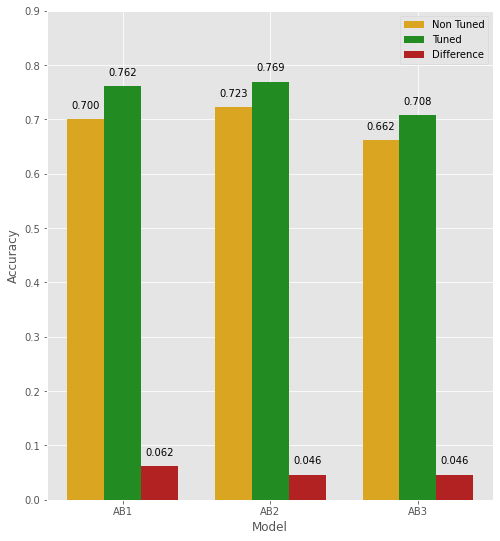

In [ ]:
N = 3
ind = np.arange(N) 
width = 0.25

plt.figure(figsize=(8,9))
non_tuning_acc = [ab1_non_tuning_acc.mean(),  ab2_non_tuning_acc.mean(),  ab3_non_tuning_acc.mean()]
bar1 = plt.bar(ind, non_tuning_acc, width, color='goldenrod')
  
tuning_acc = [ab1_tuning_acc.mean(),  ab2_tuning_acc.mean(),  ab3_tuning_acc.mean()]
bar2 = plt.bar(ind+width, tuning_acc, width, color='forestgreen')

selisih = []
for i in range(0, len(non_tuning_acc)):
  selisih.append(np.abs(non_tuning_acc[i]-tuning_acc[i]))

bar3 = plt.bar(ind+width*2, selisih, width, color = 'firebrick')

addlabels(non_tuning_acc, tuning_acc, selisih)
plt.xlabel("Model")
plt.ylabel('Accuracy')
plt.ylim([0,0.9])

plt.xticks(ind+width,['AB1', 'AB2', 'AB3'])
plt.legend( (bar1, bar2, bar3), ('Non Tuned', 'Tuned', 'Difference') )
plt.show()

## Export

Export model

In [ ]:
joblib.dump(ab1_model, 'ab1_model.pkl')
joblib.dump(ab2_model, 'ab2_model.pkl')
joblib.dump(ab3_model, 'ab3_model.pkl')

['ab3_model.pkl']